In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="LSTM seq 2048.", name="epoch 1000")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.LSTM(2048, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=1000, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2048)              16801792  
                                                                 
 dense (Dense)               (None, 25)                51225     
                                                                 
Total params: 16,853,017
Trainable params: 16,853,017
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/1000
5/5 [==============================] - ETA: 0s - loss: 5.1010 - mae: 1.7743

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 10s 2s/step - loss: 5.1010 - mae: 1.7743 - val_loss: 0.8424 - val_mae: 0.8022
Epoch 2/1000
5/5 [==============================] - ETA: 0s - loss: 0.8490 - mae: 0.8038

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.8490 - mae: 0.8038 - val_loss: 0.3536 - val_mae: 0.4837
Epoch 3/1000
5/5 [==============================] - ETA: 0s - loss: 0.2553 - mae: 0.4087

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.2553 - mae: 0.4087 - val_loss: 0.2235 - val_mae: 0.3863
Epoch 4/1000
5/5 [==============================] - ETA: 0s - loss: 0.2135 - mae: 0.3819

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.2135 - mae: 0.3819 - val_loss: 0.1873 - val_mae: 0.3587
Epoch 5/1000
5/5 [==============================] - ETA: 0s - loss: 0.1817 - mae: 0.3545

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1817 - mae: 0.3545 - val_loss: 0.1837 - val_mae: 0.3620
Epoch 6/1000
5/5 [==============================] - 1s 235ms/step - loss: 0.1893 - mae: 0.3607 - val_loss: 0.1866 - val_mae: 0.3642
Epoch 7/1000
5/5 [==============================] - ETA: 0s - loss: 0.1869 - mae: 0.3584

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1869 - mae: 0.3584 - val_loss: 0.1799 - val_mae: 0.3568
Epoch 8/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.1810 - mae: 0.3531 - val_loss: 0.1805 - val_mae: 0.3530
Epoch 9/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.1823 - mae: 0.3539 - val_loss: 0.1816 - val_mae: 0.3533
Epoch 10/1000
5/5 [==============================] - ETA: 0s - loss: 0.1806 - mae: 0.3528

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1806 - mae: 0.3528 - val_loss: 0.1779 - val_mae: 0.3520
Epoch 11/1000
5/5 [==============================] - ETA: 0s - loss: 0.1783 - mae: 0.3509

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1783 - mae: 0.3509 - val_loss: 0.1775 - val_mae: 0.3537
Epoch 12/1000
5/5 [==============================] - ETA: 0s - loss: 0.1787 - mae: 0.3517

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1787 - mae: 0.3517 - val_loss: 0.1774 - val_mae: 0.3536
Epoch 13/1000
5/5 [==============================] - ETA: 0s - loss: 0.1795 - mae: 0.3525

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1795 - mae: 0.3525 - val_loss: 0.1770 - val_mae: 0.3529
Epoch 14/1000
5/5 [==============================] - 1s 223ms/step - loss: 0.1773 - mae: 0.3502 - val_loss: 0.1781 - val_mae: 0.3515
Epoch 15/1000
5/5 [==============================] - ETA: 0s - loss: 0.1789 - mae: 0.3511

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1789 - mae: 0.3511 - val_loss: 0.1770 - val_mae: 0.3495
Epoch 16/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.1782 - mae: 0.3502

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1797 - mae: 0.3527 - val_loss: 0.1761 - val_mae: 0.3522
Epoch 17/1000
5/5 [==============================] - 1s 223ms/step - loss: 0.1785 - mae: 0.3514 - val_loss: 0.1772 - val_mae: 0.3539
Epoch 18/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.1783 - mae: 0.3504 - val_loss: 0.1774 - val_mae: 0.3514
Epoch 19/1000
5/5 [==============================] - ETA: 0s - loss: 0.1769 - mae: 0.3492

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1769 - mae: 0.3492 - val_loss: 0.1751 - val_mae: 0.3485
Epoch 20/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.1773 - mae: 0.3505

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1764 - mae: 0.3488 - val_loss: 0.1748 - val_mae: 0.3490
Epoch 21/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.1718 - mae: 0.3457

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1765 - mae: 0.3492 - val_loss: 0.1746 - val_mae: 0.3500
Epoch 22/1000
5/5 [==============================] - 1s 252ms/step - loss: 0.1765 - mae: 0.3492 - val_loss: 0.1752 - val_mae: 0.3487
Epoch 23/1000
5/5 [==============================] - ETA: 0s - loss: 0.1751 - mae: 0.3473

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1751 - mae: 0.3473 - val_loss: 0.1727 - val_mae: 0.3475
Epoch 24/1000
5/5 [==============================] - 1s 246ms/step - loss: 0.1750 - mae: 0.3477 - val_loss: 0.1734 - val_mae: 0.3493
Epoch 25/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.1747 - mae: 0.3474 - val_loss: 0.1743 - val_mae: 0.3472
Epoch 26/1000
5/5 [==============================] - ETA: 0s - loss: 0.1747 - mae: 0.3475

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1747 - mae: 0.3475 - val_loss: 0.1710 - val_mae: 0.3462
Epoch 27/1000
5/5 [==============================] - 1s 244ms/step - loss: 0.1734 - mae: 0.3451 - val_loss: 0.1715 - val_mae: 0.3455
Epoch 28/1000
5/5 [==============================] - ETA: 0s - loss: 0.1718 - mae: 0.3438

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1718 - mae: 0.3438 - val_loss: 0.1696 - val_mae: 0.3450
Epoch 29/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.1686 - mae: 0.3416

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1718 - mae: 0.3446 - val_loss: 0.1694 - val_mae: 0.3430
Epoch 30/1000
5/5 [==============================] - 1s 222ms/step - loss: 0.1701 - mae: 0.3425 - val_loss: 0.1700 - val_mae: 0.3428
Epoch 31/1000
5/5 [==============================] - ETA: 0s - loss: 0.1698 - mae: 0.3415

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1698 - mae: 0.3415 - val_loss: 0.1655 - val_mae: 0.3397
Epoch 32/1000
5/5 [==============================] - 1s 222ms/step - loss: 0.1673 - mae: 0.3398 - val_loss: 0.1661 - val_mae: 0.3384
Epoch 33/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.1633 - mae: 0.3346 - val_loss: 0.1657 - val_mae: 0.3402
Epoch 34/1000
5/5 [==============================] - ETA: 0s - loss: 0.1687 - mae: 0.3410

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1687 - mae: 0.3410 - val_loss: 0.1620 - val_mae: 0.3373
Epoch 35/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.1812 - mae: 0.3493

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1788 - mae: 0.3463 - val_loss: 0.1581 - val_mae: 0.3330
Epoch 36/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.1679 - mae: 0.3402 - val_loss: 0.1605 - val_mae: 0.3345
Epoch 37/1000
5/5 [==============================] - ETA: 0s - loss: 0.1723 - mae: 0.3433

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1723 - mae: 0.3433 - val_loss: 0.1573 - val_mae: 0.3307
Epoch 38/1000
5/5 [==============================] - ETA: 0s - loss: 0.1681 - mae: 0.3392

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1681 - mae: 0.3392 - val_loss: 0.1559 - val_mae: 0.3304
Epoch 39/1000
5/5 [==============================] - ETA: 0s - loss: 0.1653 - mae: 0.3381

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1653 - mae: 0.3381 - val_loss: 0.1525 - val_mae: 0.3259
Epoch 40/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.1653 - mae: 0.3393

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1606 - mae: 0.3327 - val_loss: 0.1508 - val_mae: 0.3229
Epoch 41/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.1454 - mae: 0.3149

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1481 - mae: 0.3190 - val_loss: 0.1393 - val_mae: 0.3097
Epoch 42/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.1369 - mae: 0.3073

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1364 - mae: 0.3065 - val_loss: 0.1186 - val_mae: 0.2886
Epoch 43/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.1856 - mae: 0.3451 - val_loss: 0.1788 - val_mae: 0.3466
Epoch 44/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.1602 - mae: 0.3271 - val_loss: 0.1600 - val_mae: 0.3314
Epoch 45/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.1642 - mae: 0.3364 - val_loss: 0.1587 - val_mae: 0.3338
Epoch 46/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.1616 - mae: 0.3327 - val_loss: 0.1582 - val_mae: 0.3321
Epoch 47/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.1614 - mae: 0.3328 - val_loss: 0.1561 - val_mae: 0.3284
Epoch 48/1000
5/5 [==============================] - 1s 225ms/step - loss: 0.1559 - mae: 0.3275 - val_loss: 0.1541 - val_mae: 0.3293
Epoch 49/1000
5/5 [==============================] - 1s 222ms/step - loss: 0.1570 - ma

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1631 - mae: 0.3270 - val_loss: 0.0894 - val_mae: 0.2472
Epoch 56/1000
5/5 [==============================] - 1s 233ms/step - loss: 0.1187 - mae: 0.2761 - val_loss: 0.1278 - val_mae: 0.2915
Epoch 57/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.1193 - mae: 0.2841 - val_loss: 0.1144 - val_mae: 0.2754
Epoch 58/1000
5/5 [==============================] - ETA: 0s - loss: 0.1085 - mae: 0.2694

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1085 - mae: 0.2694 - val_loss: 0.0867 - val_mae: 0.2433
Epoch 59/1000
5/5 [==============================] - ETA: 0s - loss: 0.0920 - mae: 0.2486

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0920 - mae: 0.2486 - val_loss: 0.0728 - val_mae: 0.2154
Epoch 60/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0786 - mae: 0.2255

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0785 - mae: 0.2250 - val_loss: 0.0612 - val_mae: 0.1925
Epoch 61/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.0698 - mae: 0.2075 - val_loss: 0.0736 - val_mae: 0.2077
Epoch 62/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0715 - mae: 0.2086 - val_loss: 0.0862 - val_mae: 0.2434
Epoch 63/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.0828 - mae: 0.2322 - val_loss: 0.0643 - val_mae: 0.1988
Epoch 64/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0674 - mae: 0.2025 - val_loss: 0.0612 - val_mae: 0.1925
Epoch 65/1000
5/5 [==============================] - 1s 222ms/step - loss: 0.0661 - mae: 0.1989 - val_loss: 0.0722 - val_mae: 0.2071
Epoch 66/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0654 - mae: 0.1984 - val_loss: 0.0747 - val_mae: 0.2109
Epoch 67/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0654 - ma

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0612 - mae: 0.1911 - val_loss: 0.0599 - val_mae: 0.1869
Epoch 71/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0581 - mae: 0.1862

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0595 - mae: 0.1882 - val_loss: 0.0578 - val_mae: 0.1837
Epoch 72/1000
5/5 [==============================] - 1s 231ms/step - loss: 0.0605 - mae: 0.1896 - val_loss: 0.0638 - val_mae: 0.1995
Epoch 73/1000
5/5 [==============================] - 1s 225ms/step - loss: 0.0632 - mae: 0.1952 - val_loss: 0.0637 - val_mae: 0.1983
Epoch 74/1000
5/5 [==============================] - ETA: 0s - loss: 0.0613 - mae: 0.1917

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0613 - mae: 0.1917 - val_loss: 0.0575 - val_mae: 0.1831
Epoch 75/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0602 - mae: 0.1888

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0596 - mae: 0.1876 - val_loss: 0.0574 - val_mae: 0.1834
Epoch 76/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0609 - mae: 0.1904 - val_loss: 0.0587 - val_mae: 0.1868
Epoch 77/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0637 - mae: 0.1957 - val_loss: 0.0687 - val_mae: 0.2033
Epoch 78/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0651 - mae: 0.1991 - val_loss: 0.0615 - val_mae: 0.1909
Epoch 79/1000
5/5 [==============================] - 1s 214ms/step - loss: 0.0631 - mae: 0.1943 - val_loss: 0.0672 - val_mae: 0.2079
Epoch 80/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0648 - mae: 0.1989 - val_loss: 0.0589 - val_mae: 0.1878
Epoch 81/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.0644 - mae: 0.1974 - val_loss: 0.0898 - val_mae: 0.2322
Epoch 82/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.0711 - ma

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0636 - mae: 0.1963 - val_loss: 0.0571 - val_mae: 0.1826
Epoch 87/1000
5/5 [==============================] - 1s 225ms/step - loss: 0.0641 - mae: 0.1966 - val_loss: 0.0626 - val_mae: 0.1921
Epoch 88/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0598 - mae: 0.1884 - val_loss: 0.0594 - val_mae: 0.1844
Epoch 89/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0595 - mae: 0.1880 - val_loss: 0.0575 - val_mae: 0.1853
Epoch 90/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0598 - mae: 0.1888 - val_loss: 0.0617 - val_mae: 0.1896
Epoch 91/1000
5/5 [==============================] - ETA: 0s - loss: 0.0597 - mae: 0.1884

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0597 - mae: 0.1884 - val_loss: 0.0567 - val_mae: 0.1819
Epoch 92/1000
5/5 [==============================] - 1s 241ms/step - loss: 0.0578 - mae: 0.1845 - val_loss: 0.0570 - val_mae: 0.1831
Epoch 93/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0582 - mae: 0.1850 - val_loss: 0.0577 - val_mae: 0.1828
Epoch 94/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0579 - mae: 0.1848 - val_loss: 0.0575 - val_mae: 0.1832
Epoch 95/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0606 - mae: 0.1889 - val_loss: 0.0594 - val_mae: 0.1895
Epoch 96/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0593 - mae: 0.1874 - val_loss: 0.0579 - val_mae: 0.1833
Epoch 97/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0573 - mae: 0.1835 - val_loss: 0.0676 - val_mae: 0.1970
Epoch 98/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.0612 - ma

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0594 - mae: 0.1875 - val_loss: 0.0566 - val_mae: 0.1821
Epoch 104/1000
5/5 [==============================] - 1s 239ms/step - loss: 0.0574 - mae: 0.1832 - val_loss: 0.0580 - val_mae: 0.1869
Epoch 105/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0660 - mae: 0.2017 - val_loss: 0.0799 - val_mae: 0.2187
Epoch 106/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0677 - mae: 0.2032 - val_loss: 0.0819 - val_mae: 0.2244
Epoch 107/1000
5/5 [==============================] - ETA: 0s - loss: 0.0702 - mae: 0.2076

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0702 - mae: 0.2076 - val_loss: 0.0559 - val_mae: 0.1819
Epoch 108/1000
5/5 [==============================] - 1s 228ms/step - loss: 0.0661 - mae: 0.2010 - val_loss: 0.0575 - val_mae: 0.1851
Epoch 109/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0690 - mae: 0.2062 - val_loss: 0.0718 - val_mae: 0.2046
Epoch 110/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0677 - mae: 0.2032 - val_loss: 0.0863 - val_mae: 0.2312
Epoch 111/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0662 - mae: 0.2000 - val_loss: 0.0723 - val_mae: 0.2081
Epoch 112/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0606 - mae: 0.1907 - val_loss: 0.0573 - val_mae: 0.1824
Epoch 113/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0583 - mae: 0.1864 - val_loss: 0.0562 - val_mae: 0.1802
Epoch 114/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.05

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0573 - mae: 0.1836 - val_loss: 0.0554 - val_mae: 0.1797
Epoch 116/1000
5/5 [==============================] - 1s 256ms/step - loss: 0.0586 - mae: 0.1856 - val_loss: 0.0577 - val_mae: 0.1854
Epoch 117/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0587 - mae: 0.1858 - val_loss: 0.0556 - val_mae: 0.1796
Epoch 118/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0581 - mae: 0.1855 - val_loss: 0.0656 - val_mae: 0.1950
Epoch 119/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0627 - mae: 0.1944 - val_loss: 0.0698 - val_mae: 0.1996
Epoch 120/1000
5/5 [==============================] - ETA: 0s - loss: 0.0596 - mae: 0.1884

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0596 - mae: 0.1884 - val_loss: 0.0551 - val_mae: 0.1780
Epoch 121/1000
5/5 [==============================] - 1s 222ms/step - loss: 0.0614 - mae: 0.1924 - val_loss: 0.0633 - val_mae: 0.1998
Epoch 122/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0621 - mae: 0.1931 - val_loss: 0.0575 - val_mae: 0.1839
Epoch 123/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0599 - mae: 0.1892 - val_loss: 0.0623 - val_mae: 0.1890
Epoch 124/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0590 - mae: 0.1872 - val_loss: 0.0650 - val_mae: 0.1953
Epoch 125/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0598 - mae: 0.1878 - val_loss: 0.0564 - val_mae: 0.1813
Epoch 126/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0569 - mae: 0.1828 - val_loss: 0.0567 - val_mae: 0.1813
Epoch 127/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.05

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0581 - mae: 0.1864 - val_loss: 0.0550 - val_mae: 0.1775
Epoch 131/1000
5/5 [==============================] - 1s 242ms/step - loss: 0.0561 - mae: 0.1817 - val_loss: 0.0620 - val_mae: 0.1882
Epoch 132/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0583 - mae: 0.1859 - val_loss: 0.0562 - val_mae: 0.1831
Epoch 133/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0592 - mae: 0.1878 - val_loss: 0.0574 - val_mae: 0.1845
Epoch 134/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0608 - mae: 0.1904 - val_loss: 0.0567 - val_mae: 0.1815
Epoch 135/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0565 - mae: 0.1827 - val_loss: 0.0562 - val_mae: 0.1800
Epoch 136/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0569 - mae: 0.1830 - val_loss: 0.0555 - val_mae: 0.1791
Epoch 137/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.05

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0574 - mae: 0.1853 - val_loss: 0.0543 - val_mae: 0.1779
Epoch 183/1000
5/5 [==============================] - 1s 223ms/step - loss: 0.0566 - mae: 0.1826 - val_loss: 0.0584 - val_mae: 0.1818
Epoch 184/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0534 - mae: 0.1758 - val_loss: 0.0545 - val_mae: 0.1779
Epoch 185/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0533 - mae: 0.1765 - val_loss: 0.0548 - val_mae: 0.1770
Epoch 186/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0526 - mae: 0.1745 - val_loss: 0.0549 - val_mae: 0.1782
Epoch 187/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0539 - mae: 0.1781 - val_loss: 0.0557 - val_mae: 0.1779
Epoch 188/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0531 - mae: 0.1765 - val_loss: 0.0580 - val_mae: 0.1812
Epoch 189/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.05

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0520 - mae: 0.1743 - val_loss: 0.0530 - val_mae: 0.1761
Epoch 202/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0523 - mae: 0.1748 - val_loss: 0.0540 - val_mae: 0.1755
Epoch 203/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.0538 - mae: 0.1778 - val_loss: 0.0563 - val_mae: 0.1786
Epoch 204/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0529 - mae: 0.1752 - val_loss: 0.0537 - val_mae: 0.1737
Epoch 205/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0503 - mae: 0.1717 - val_loss: 0.0546 - val_mae: 0.1757
Epoch 206/1000
5/5 [==============================] - ETA: 0s - loss: 0.0509 - mae: 0.1714

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0509 - mae: 0.1714 - val_loss: 0.0521 - val_mae: 0.1715
Epoch 207/1000
5/5 [==============================] - 1s 226ms/step - loss: 0.0500 - mae: 0.1696 - val_loss: 0.0523 - val_mae: 0.1736
Epoch 208/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0498 - mae: 0.1699 - val_loss: 0.0527 - val_mae: 0.1773
Epoch 209/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0515 - mae: 0.1741 - val_loss: 0.0530 - val_mae: 0.1722
Epoch 210/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0514 - mae: 0.1728 - val_loss: 0.0638 - val_mae: 0.1906
Epoch 211/1000
5/5 [==============================] - ETA: 0s - loss: 0.0524 - mae: 0.1761

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0524 - mae: 0.1761 - val_loss: 0.0517 - val_mae: 0.1728
Epoch 212/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0505 - mae: 0.1710 - val_loss: 0.0521 - val_mae: 0.1741
Epoch 213/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0481 - mae: 0.1672 - val_loss: 0.0537 - val_mae: 0.1813
Epoch 214/1000
5/5 [==============================] - 1s 223ms/step - loss: 0.0506 - mae: 0.1729 - val_loss: 0.0573 - val_mae: 0.1928
Epoch 215/1000
5/5 [==============================] - 1s 222ms/step - loss: 0.0502 - mae: 0.1721 - val_loss: 0.0522 - val_mae: 0.1715
Epoch 216/1000
5/5 [==============================] - ETA: 0s - loss: 0.0522 - mae: 0.1742

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0522 - mae: 0.1742 - val_loss: 0.0497 - val_mae: 0.1697
Epoch 217/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0472 - mae: 0.1668 - val_loss: 0.0516 - val_mae: 0.1767
Epoch 218/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0502 - mae: 0.1712 - val_loss: 0.0518 - val_mae: 0.1790
Epoch 219/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0482 - mae: 0.1699 - val_loss: 0.0539 - val_mae: 0.1757
Epoch 220/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0518 - mae: 0.1766 - val_loss: 0.0622 - val_mae: 0.1895
Epoch 221/1000
5/5 [==============================] - ETA: 0s - loss: 0.0512 - mae: 0.1742

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0512 - mae: 0.1742 - val_loss: 0.0491 - val_mae: 0.1687
Epoch 222/1000
5/5 [==============================] - ETA: 0s - loss: 0.0453 - mae: 0.1652

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0453 - mae: 0.1652 - val_loss: 0.0470 - val_mae: 0.1686
Epoch 223/1000
5/5 [==============================] - ETA: 0s - loss: 0.0431 - mae: 0.1598

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0431 - mae: 0.1598 - val_loss: 0.0454 - val_mae: 0.1629
Epoch 224/1000
5/5 [==============================] - 1s 235ms/step - loss: 0.0414 - mae: 0.1550 - val_loss: 0.0455 - val_mae: 0.1596
Epoch 225/1000
5/5 [==============================] - ETA: 0s - loss: 0.0402 - mae: 0.1532

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0402 - mae: 0.1532 - val_loss: 0.0428 - val_mae: 0.1599
Epoch 226/1000
5/5 [==============================] - ETA: 0s - loss: 0.0404 - mae: 0.1540

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0404 - mae: 0.1540 - val_loss: 0.0420 - val_mae: 0.1550
Epoch 227/1000
5/5 [==============================] - ETA: 0s - loss: 0.0384 - mae: 0.1496

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0384 - mae: 0.1496 - val_loss: 0.0416 - val_mae: 0.1573
Epoch 228/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0389 - mae: 0.1513

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0393 - mae: 0.1522 - val_loss: 0.0397 - val_mae: 0.1511
Epoch 229/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0385 - mae: 0.1518 - val_loss: 0.0489 - val_mae: 0.1705
Epoch 230/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0402 - mae: 0.1541 - val_loss: 0.0418 - val_mae: 0.1607
Epoch 231/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0414 - mae: 0.1572 - val_loss: 0.0449 - val_mae: 0.1647
Epoch 232/1000
5/5 [==============================] - ETA: 0s - loss: 0.0399 - mae: 0.1542

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0399 - mae: 0.1542 - val_loss: 0.0367 - val_mae: 0.1491
Epoch 233/1000
5/5 [==============================] - 1s 225ms/step - loss: 0.0388 - mae: 0.1524 - val_loss: 0.0409 - val_mae: 0.1534
Epoch 234/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0414 - mae: 0.1585 - val_loss: 0.0506 - val_mae: 0.1777
Epoch 235/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0397 - mae: 0.1544 - val_loss: 0.0406 - val_mae: 0.1522
Epoch 236/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0377 - mae: 0.1506 - val_loss: 0.0387 - val_mae: 0.1507
Epoch 237/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.0365 - mae: 0.1473 - val_loss: 0.0383 - val_mae: 0.1522
Epoch 238/1000
5/5 [==============================] - ETA: 0s - loss: 0.0362 - mae: 0.1473

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0362 - mae: 0.1473 - val_loss: 0.0366 - val_mae: 0.1451
Epoch 239/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0338 - mae: 0.1405

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0341 - mae: 0.1412 - val_loss: 0.0344 - val_mae: 0.1430
Epoch 240/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0327 - mae: 0.1382 - val_loss: 0.0361 - val_mae: 0.1454
Epoch 241/1000
5/5 [==============================] - ETA: 0s - loss: 0.0319 - mae: 0.1383

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0319 - mae: 0.1383 - val_loss: 0.0326 - val_mae: 0.1390
Epoch 242/1000
5/5 [==============================] - ETA: 0s - loss: 0.0311 - mae: 0.1352

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0311 - mae: 0.1352 - val_loss: 0.0324 - val_mae: 0.1379
Epoch 243/1000
5/5 [==============================] - ETA: 0s - loss: 0.0299 - mae: 0.1331

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0299 - mae: 0.1331 - val_loss: 0.0306 - val_mae: 0.1349
Epoch 244/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0294 - mae: 0.1326 - val_loss: 0.0315 - val_mae: 0.1354
Epoch 245/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0299 - mae: 0.1335 - val_loss: 0.0328 - val_mae: 0.1427
Epoch 246/1000
5/5 [==============================] - ETA: 0s - loss: 0.0288 - mae: 0.1327

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0288 - mae: 0.1327 - val_loss: 0.0303 - val_mae: 0.1313
Epoch 247/1000
5/5 [==============================] - ETA: 0s - loss: 0.0290 - mae: 0.1311

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0290 - mae: 0.1311 - val_loss: 0.0287 - val_mae: 0.1299
Epoch 248/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0277 - mae: 0.1289

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0281 - mae: 0.1296 - val_loss: 0.0276 - val_mae: 0.1312
Epoch 249/1000
5/5 [==============================] - ETA: 0s - loss: 0.0248 - mae: 0.1219

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0248 - mae: 0.1219 - val_loss: 0.0273 - val_mae: 0.1281
Epoch 250/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0250 - mae: 0.1224

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0251 - mae: 0.1228 - val_loss: 0.0261 - val_mae: 0.1252
Epoch 251/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0251 - mae: 0.1225 - val_loss: 0.0327 - val_mae: 0.1394
Epoch 252/1000
5/5 [==============================] - ETA: 0s - loss: 0.0268 - mae: 0.1284

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0268 - mae: 0.1284 - val_loss: 0.0254 - val_mae: 0.1231
Epoch 253/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0241 - mae: 0.1214 - val_loss: 0.0263 - val_mae: 0.1303
Epoch 254/1000
5/5 [==============================] - ETA: 0s - loss: 0.0224 - mae: 0.1178

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0224 - mae: 0.1178 - val_loss: 0.0237 - val_mae: 0.1199
Epoch 255/1000
5/5 [==============================] - 1s 249ms/step - loss: 0.0226 - mae: 0.1170 - val_loss: 0.0290 - val_mae: 0.1414
Epoch 256/1000
5/5 [==============================] - 1s 214ms/step - loss: 0.0237 - mae: 0.1224 - val_loss: 0.0268 - val_mae: 0.1300
Epoch 257/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.0236 - mae: 0.1209 - val_loss: 0.0313 - val_mae: 0.1386
Epoch 258/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0244 - mae: 0.1256 - val_loss: 0.0306 - val_mae: 0.1386
Epoch 259/1000
5/5 [==============================] - ETA: 0s - loss: 0.0229 - mae: 0.1194

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0229 - mae: 0.1194 - val_loss: 0.0213 - val_mae: 0.1142
Epoch 260/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0266 - mae: 0.1259 - val_loss: 0.0266 - val_mae: 0.1291
Epoch 261/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.0244 - mae: 0.1225 - val_loss: 0.0269 - val_mae: 0.1321
Epoch 262/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.0219 - mae: 0.1165 - val_loss: 0.0229 - val_mae: 0.1217
Epoch 263/1000
5/5 [==============================] - ETA: 0s - loss: 0.0186 - mae: 0.1084

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0186 - mae: 0.1084 - val_loss: 0.0205 - val_mae: 0.1139
Epoch 264/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0176 - mae: 0.1042

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0177 - mae: 0.1046 - val_loss: 0.0196 - val_mae: 0.1112
Epoch 265/1000
5/5 [==============================] - 1s 227ms/step - loss: 0.0164 - mae: 0.1021 - val_loss: 0.0234 - val_mae: 0.1228
Epoch 266/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0175 - mae: 0.1046 - val_loss: 0.0213 - val_mae: 0.1141
Epoch 267/1000
5/5 [==============================] - ETA: 0s - loss: 0.0173 - mae: 0.1049

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0173 - mae: 0.1049 - val_loss: 0.0180 - val_mae: 0.1063
Epoch 268/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0150 - mae: 0.0969

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0153 - mae: 0.0976 - val_loss: 0.0171 - val_mae: 0.1034
Epoch 269/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0236 - mae: 0.1194 - val_loss: 0.0286 - val_mae: 0.1283
Epoch 270/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.0258 - mae: 0.1243 - val_loss: 0.0227 - val_mae: 0.1167
Epoch 271/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0241 - mae: 0.1198 - val_loss: 0.0766 - val_mae: 0.2143
Epoch 272/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.0592 - mae: 0.1881 - val_loss: 0.0610 - val_mae: 0.1886
Epoch 273/1000
5/5 [==============================] - 1s 213ms/step - loss: 0.0542 - mae: 0.1774 - val_loss: 0.0625 - val_mae: 0.1976
Epoch 274/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0568 - mae: 0.1845 - val_loss: 0.0531 - val_mae: 0.1761
Epoch 275/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.05

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0148 - mae: 0.0980 - val_loss: 0.0167 - val_mae: 0.1041
Epoch 324/1000
5/5 [==============================] - 1s 223ms/step - loss: 0.0139 - mae: 0.0943 - val_loss: 0.0172 - val_mae: 0.1030
Epoch 325/1000
5/5 [==============================] - ETA: 0s - loss: 0.0134 - mae: 0.0923

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0134 - mae: 0.0923 - val_loss: 0.0162 - val_mae: 0.1011
Epoch 326/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0130 - mae: 0.0915

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0132 - mae: 0.0922 - val_loss: 0.0146 - val_mae: 0.0964
Epoch 327/1000
5/5 [==============================] - ETA: 0s - loss: 0.0122 - mae: 0.0888

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0122 - mae: 0.0888 - val_loss: 0.0142 - val_mae: 0.0941
Epoch 328/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0119 - mae: 0.0868

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0118 - mae: 0.0866 - val_loss: 0.0141 - val_mae: 0.0934
Epoch 329/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0111 - mae: 0.0833

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0111 - mae: 0.0836 - val_loss: 0.0133 - val_mae: 0.0910
Epoch 330/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0118 - mae: 0.0858 - val_loss: 0.0154 - val_mae: 0.0977
Epoch 331/1000
5/5 [==============================] - 1s 213ms/step - loss: 0.0123 - mae: 0.0881 - val_loss: 0.0154 - val_mae: 0.0967
Epoch 332/1000
5/5 [==============================] - ETA: 0s - loss: 0.0118 - mae: 0.0858

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0118 - mae: 0.0858 - val_loss: 0.0116 - val_mae: 0.0836
Epoch 333/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.0102 - mae: 0.0801 - val_loss: 0.0141 - val_mae: 0.0947
Epoch 334/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.0108 - mae: 0.0822 - val_loss: 0.0134 - val_mae: 0.0904
Epoch 335/1000
5/5 [==============================] - ETA: 0s - loss: 0.0099 - mae: 0.0783

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0099 - mae: 0.0783 - val_loss: 0.0105 - val_mae: 0.0799
Epoch 336/1000
5/5 [==============================] - 1s 247ms/step - loss: 0.0082 - mae: 0.0719 - val_loss: 0.0111 - val_mae: 0.0832
Epoch 337/1000
5/5 [==============================] - ETA: 0s - loss: 0.0084 - mae: 0.0726

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0084 - mae: 0.0726 - val_loss: 0.0100 - val_mae: 0.0776
Epoch 338/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0087 - mae: 0.0741 - val_loss: 0.0137 - val_mae: 0.0938
Epoch 339/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0086 - mae: 0.0734 - val_loss: 0.0114 - val_mae: 0.0849
Epoch 340/1000
5/5 [==============================] - ETA: 0s - loss: 0.0076 - mae: 0.0698

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0076 - mae: 0.0698 - val_loss: 0.0087 - val_mae: 0.0730
Epoch 341/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0070 - mae: 0.0661 - val_loss: 0.0091 - val_mae: 0.0752
Epoch 342/1000
5/5 [==============================] - ETA: 0s - loss: 0.0067 - mae: 0.0649

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0067 - mae: 0.0649 - val_loss: 0.0082 - val_mae: 0.0707
Epoch 343/1000
5/5 [==============================] - 1s 235ms/step - loss: 0.0063 - mae: 0.0630 - val_loss: 0.0090 - val_mae: 0.0746
Epoch 344/1000
5/5 [==============================] - ETA: 0s - loss: 0.0070 - mae: 0.0658

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0070 - mae: 0.0658 - val_loss: 0.0079 - val_mae: 0.0697
Epoch 345/1000
5/5 [==============================] - 1s 228ms/step - loss: 0.0064 - mae: 0.0635 - val_loss: 0.0083 - val_mae: 0.0719
Epoch 346/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.0060 - mae: 0.0615 - val_loss: 0.0082 - val_mae: 0.0707
Epoch 347/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0059 - mae: 0.0608 - val_loss: 0.0112 - val_mae: 0.0832
Epoch 348/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0074 - mae: 0.0686 - val_loss: 0.0084 - val_mae: 0.0731
Epoch 349/1000
5/5 [==============================] - ETA: 0s - loss: 0.0057 - mae: 0.0601

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0057 - mae: 0.0601 - val_loss: 0.0078 - val_mae: 0.0695
Epoch 350/1000
5/5 [==============================] - 1s 241ms/step - loss: 0.0055 - mae: 0.0588 - val_loss: 0.0079 - val_mae: 0.0709
Epoch 351/1000
5/5 [==============================] - 1s 214ms/step - loss: 0.0057 - mae: 0.0599 - val_loss: 0.0078 - val_mae: 0.0698
Epoch 352/1000
5/5 [==============================] - ETA: 0s - loss: 0.0058 - mae: 0.0603

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0058 - mae: 0.0603 - val_loss: 0.0075 - val_mae: 0.0686
Epoch 353/1000
5/5 [==============================] - 1s 242ms/step - loss: 0.0058 - mae: 0.0607 - val_loss: 0.0077 - val_mae: 0.0689
Epoch 354/1000
5/5 [==============================] - 1s 214ms/step - loss: 0.0067 - mae: 0.0645 - val_loss: 0.0086 - val_mae: 0.0728
Epoch 355/1000
5/5 [==============================] - 1s 213ms/step - loss: 0.0068 - mae: 0.0658 - val_loss: 0.0077 - val_mae: 0.0702
Epoch 356/1000
5/5 [==============================] - 1s 215ms/step - loss: 0.0069 - mae: 0.0661 - val_loss: 0.0138 - val_mae: 0.0975
Epoch 357/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0089 - mae: 0.0750 - val_loss: 0.0168 - val_mae: 0.1068
Epoch 358/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0103 - mae: 0.0813 - val_loss: 0.0086 - val_mae: 0.0740
Epoch 359/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0087 - mae: 0.0743 - val_loss: 0.0074 - val_mae: 0.0684
Epoch 361/1000
5/5 [==============================] - 1s 239ms/step - loss: 0.0062 - mae: 0.0628 - val_loss: 0.0085 - val_mae: 0.0729
Epoch 362/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0057 - mae: 0.0603 - val_loss: 0.0075 - val_mae: 0.0695
Epoch 363/1000
5/5 [==============================] - ETA: 0s - loss: 0.0052 - mae: 0.0566

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0052 - mae: 0.0566 - val_loss: 0.0070 - val_mae: 0.0664
Epoch 364/1000
5/5 [==============================] - 1s 242ms/step - loss: 0.0050 - mae: 0.0569 - val_loss: 0.0074 - val_mae: 0.0679
Epoch 365/1000
5/5 [==============================] - ETA: 0s - loss: 0.0049 - mae: 0.0554

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0049 - mae: 0.0554 - val_loss: 0.0067 - val_mae: 0.0644
Epoch 366/1000
5/5 [==============================] - 1s 225ms/step - loss: 0.0045 - mae: 0.0533 - val_loss: 0.0069 - val_mae: 0.0651
Epoch 367/1000
5/5 [==============================] - ETA: 0s - loss: 0.0045 - mae: 0.0526

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0045 - mae: 0.0526 - val_loss: 0.0065 - val_mae: 0.0644
Epoch 368/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0043 - mae: 0.0521 - val_loss: 0.0073 - val_mae: 0.0672
Epoch 369/1000
5/5 [==============================] - ETA: 0s - loss: 0.0045 - mae: 0.0530

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0045 - mae: 0.0530 - val_loss: 0.0060 - val_mae: 0.0616
Epoch 370/1000
5/5 [==============================] - ETA: 0s - loss: 0.0045 - mae: 0.0531

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0045 - mae: 0.0531 - val_loss: 0.0059 - val_mae: 0.0602
Epoch 371/1000
5/5 [==============================] - ETA: 0s - loss: 0.0040 - mae: 0.0502

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0040 - mae: 0.0502 - val_loss: 0.0059 - val_mae: 0.0610
Epoch 372/1000
5/5 [==============================] - 1s 225ms/step - loss: 0.0038 - mae: 0.0491 - val_loss: 0.0061 - val_mae: 0.0612
Epoch 373/1000
5/5 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.0489

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0039 - mae: 0.0489 - val_loss: 0.0059 - val_mae: 0.0614
Epoch 374/1000
5/5 [==============================] - 1s 244ms/step - loss: 0.0040 - mae: 0.0499 - val_loss: 0.0075 - val_mae: 0.0686
Epoch 375/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0049 - mae: 0.0551 - val_loss: 0.0085 - val_mae: 0.0735
Epoch 376/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0048 - mae: 0.0553 - val_loss: 0.0061 - val_mae: 0.0622
Epoch 377/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0039 - mae: 0.0496 - val_loss: 0.0062 - val_mae: 0.0622
Epoch 378/1000
5/5 [==============================] - ETA: 0s - loss: 0.0037 - mae: 0.0482

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0037 - mae: 0.0482 - val_loss: 0.0057 - val_mae: 0.0601
Epoch 379/1000
4/5 [=======================>......] - ETA: 0s - loss: 0.0035 - mae: 0.0465

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0034 - mae: 0.0462 - val_loss: 0.0056 - val_mae: 0.0592
Epoch 380/1000
5/5 [==============================] - 1s 230ms/step - loss: 0.0034 - mae: 0.0463 - val_loss: 0.0058 - val_mae: 0.0600
Epoch 381/1000
5/5 [==============================] - ETA: 0s - loss: 0.0037 - mae: 0.0475

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0037 - mae: 0.0475 - val_loss: 0.0054 - val_mae: 0.0578
Epoch 382/1000
5/5 [==============================] - 1s 243ms/step - loss: 0.0034 - mae: 0.0458 - val_loss: 0.0055 - val_mae: 0.0590
Epoch 383/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.0035 - mae: 0.0461 - val_loss: 0.0058 - val_mae: 0.0602
Epoch 384/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0036 - mae: 0.0472 - val_loss: 0.0059 - val_mae: 0.0607
Epoch 385/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0036 - mae: 0.0471 - val_loss: 0.0057 - val_mae: 0.0597
Epoch 386/1000
5/5 [==============================] - ETA: 0s - loss: 0.0032 - mae: 0.0450

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0032 - mae: 0.0450 - val_loss: 0.0051 - val_mae: 0.0572
Epoch 387/1000
5/5 [==============================] - 1s 244ms/step - loss: 0.0031 - mae: 0.0439 - val_loss: 0.0052 - val_mae: 0.0569
Epoch 388/1000
5/5 [==============================] - 1s 223ms/step - loss: 0.0032 - mae: 0.0447 - val_loss: 0.0058 - val_mae: 0.0597
Epoch 389/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0034 - mae: 0.0465 - val_loss: 0.0069 - val_mae: 0.0651
Epoch 390/1000
5/5 [==============================] - ETA: 0s - loss: 0.0044 - mae: 0.0530

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0044 - mae: 0.0530 - val_loss: 0.0050 - val_mae: 0.0555
Epoch 391/1000
5/5 [==============================] - 1s 247ms/step - loss: 0.0032 - mae: 0.0447 - val_loss: 0.0050 - val_mae: 0.0562
Epoch 392/1000
5/5 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0436

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0030 - mae: 0.0436 - val_loss: 0.0050 - val_mae: 0.0558
Epoch 393/1000
5/5 [==============================] - 1s 243ms/step - loss: 0.0035 - mae: 0.0476 - val_loss: 0.0060 - val_mae: 0.0614
Epoch 394/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0034 - mae: 0.0467 - val_loss: 0.0050 - val_mae: 0.0558
Epoch 395/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0031 - mae: 0.0446 - val_loss: 0.0068 - val_mae: 0.0654
Epoch 396/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0037 - mae: 0.0485 - val_loss: 0.0053 - val_mae: 0.0576
Epoch 397/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0033 - mae: 0.0453 - val_loss: 0.0050 - val_mae: 0.0566
Epoch 398/1000
5/5 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0429

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0030 - mae: 0.0429 - val_loss: 0.0046 - val_mae: 0.0531
Epoch 399/1000
5/5 [==============================] - ETA: 0s - loss: 0.0027 - mae: 0.0418

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0027 - mae: 0.0418 - val_loss: 0.0045 - val_mae: 0.0533
Epoch 400/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0026 - mae: 0.0402 - val_loss: 0.0045 - val_mae: 0.0535
Epoch 401/1000
5/5 [==============================] - ETA: 0s - loss: 0.0025 - mae: 0.0400

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0025 - mae: 0.0400 - val_loss: 0.0043 - val_mae: 0.0519
Epoch 402/1000
5/5 [==============================] - 1s 250ms/step - loss: 0.0025 - mae: 0.0391 - val_loss: 0.0045 - val_mae: 0.0531
Epoch 403/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0027 - mae: 0.0410 - val_loss: 0.0048 - val_mae: 0.0553
Epoch 404/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0030 - mae: 0.0430 - val_loss: 0.0060 - val_mae: 0.0620
Epoch 405/1000
5/5 [==============================] - 1s 222ms/step - loss: 0.0031 - mae: 0.0442 - val_loss: 0.0048 - val_mae: 0.0542
Epoch 406/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0028 - mae: 0.0419 - val_loss: 0.0047 - val_mae: 0.0540
Epoch 407/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0028 - mae: 0.0415 - val_loss: 0.0044 - val_mae: 0.0528
Epoch 408/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0025 - mae: 0.0395 - val_loss: 0.0042 - val_mae: 0.0507
Epoch 415/1000
5/5 [==============================] - 1s 225ms/step - loss: 0.0023 - mae: 0.0384 - val_loss: 0.0042 - val_mae: 0.0515
Epoch 416/1000
5/5 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0368

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0022 - mae: 0.0368 - val_loss: 0.0041 - val_mae: 0.0509
Epoch 417/1000
5/5 [==============================] - 1s 247ms/step - loss: 0.0022 - mae: 0.0370 - val_loss: 0.0043 - val_mae: 0.0517
Epoch 418/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0023 - mae: 0.0377 - val_loss: 0.0051 - val_mae: 0.0576
Epoch 419/1000
5/5 [==============================] - ETA: 0s - loss: 0.0026 - mae: 0.0404

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0026 - mae: 0.0404 - val_loss: 0.0039 - val_mae: 0.0496
Epoch 420/1000
5/5 [==============================] - 1s 238ms/step - loss: 0.0021 - mae: 0.0363 - val_loss: 0.0044 - val_mae: 0.0515
Epoch 421/1000
5/5 [==============================] - 1s 222ms/step - loss: 0.0022 - mae: 0.0373 - val_loss: 0.0049 - val_mae: 0.0558
Epoch 422/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0024 - mae: 0.0391 - val_loss: 0.0040 - val_mae: 0.0501
Epoch 423/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.0027 - mae: 0.0411 - val_loss: 0.0041 - val_mae: 0.0502
Epoch 424/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0032 - mae: 0.0448 - val_loss: 0.0063 - val_mae: 0.0637
Epoch 425/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0039 - mae: 0.0497 - val_loss: 0.0055 - val_mae: 0.0584
Epoch 426/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0020 - mae: 0.0353 - val_loss: 0.0037 - val_mae: 0.0479
Epoch 453/1000
5/5 [==============================] - 1s 247ms/step - loss: 0.0016 - mae: 0.0323 - val_loss: 0.0039 - val_mae: 0.0486
Epoch 454/1000
5/5 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0315

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0016 - mae: 0.0315 - val_loss: 0.0036 - val_mae: 0.0470
Epoch 455/1000
5/5 [==============================] - 1s 243ms/step - loss: 0.0015 - mae: 0.0309 - val_loss: 0.0036 - val_mae: 0.0472
Epoch 456/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0014 - mae: 0.0300 - val_loss: 0.0038 - val_mae: 0.0475
Epoch 457/1000
5/5 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0310

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0015 - mae: 0.0310 - val_loss: 0.0034 - val_mae: 0.0457
Epoch 458/1000
5/5 [==============================] - 1s 243ms/step - loss: 0.0015 - mae: 0.0301 - val_loss: 0.0038 - val_mae: 0.0486
Epoch 459/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0015 - mae: 0.0312 - val_loss: 0.0036 - val_mae: 0.0466
Epoch 460/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.0014 - mae: 0.0298 - val_loss: 0.0036 - val_mae: 0.0470
Epoch 461/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0017 - mae: 0.0323 - val_loss: 0.0036 - val_mae: 0.0463
Epoch 462/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0015 - mae: 0.0303 - val_loss: 0.0040 - val_mae: 0.0504
Epoch 463/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0018 - mae: 0.0343 - val_loss: 0.0034 - val_mae: 0.0457
Epoch 464/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0012 - mae: 0.0274 - val_loss: 0.0034 - val_mae: 0.0456
Epoch 504/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0012 - mae: 0.0272 - val_loss: 0.0035 - val_mae: 0.0462
Epoch 505/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0013 - mae: 0.0284 - val_loss: 0.0049 - val_mae: 0.0554
Epoch 506/1000
5/5 [==============================] - 1s 224ms/step - loss: 0.0020 - mae: 0.0352 - val_loss: 0.0051 - val_mae: 0.0556
Epoch 507/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0025 - mae: 0.0399 - val_loss: 0.0039 - val_mae: 0.0499
Epoch 508/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0017 - mae: 0.0329 - val_loss: 0.0041 - val_mae: 0.0493
Epoch 509/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0019 - mae: 0.0338 - val_loss: 0.0037 - val_mae: 0.0481
Epoch 510/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0011 - mae: 0.0261 - val_loss: 0.0034 - val_mae: 0.0449
Epoch 519/1000
5/5 [==============================] - 1s 233ms/step - loss: 0.0011 - mae: 0.0260 - val_loss: 0.0036 - val_mae: 0.0473
Epoch 520/1000
5/5 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0288

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0013 - mae: 0.0288 - val_loss: 0.0034 - val_mae: 0.0451
Epoch 521/1000
5/5 [==============================] - 1s 228ms/step - loss: 0.0013 - mae: 0.0284 - val_loss: 0.0037 - val_mae: 0.0466
Epoch 522/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0012 - mae: 0.0272 - val_loss: 0.0035 - val_mae: 0.0460
Epoch 523/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0011 - mae: 0.0265 - val_loss: 0.0034 - val_mae: 0.0453
Epoch 524/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0011 - mae: 0.0264 - val_loss: 0.0035 - val_mae: 0.0474
Epoch 525/1000
5/5 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0270

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0011 - mae: 0.0270 - val_loss: 0.0034 - val_mae: 0.0450
Epoch 526/1000
5/5 [==============================] - 1s 241ms/step - loss: 0.0011 - mae: 0.0267 - val_loss: 0.0038 - val_mae: 0.0487
Epoch 527/1000
5/5 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0273

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0012 - mae: 0.0273 - val_loss: 0.0032 - val_mae: 0.0436
Epoch 528/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.0011 - mae: 0.0259 - val_loss: 0.0034 - val_mae: 0.0454
Epoch 529/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0010 - mae: 0.0255 - val_loss: 0.0034 - val_mae: 0.0454
Epoch 530/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.0011 - mae: 0.0262 - val_loss: 0.0033 - val_mae: 0.0451
Epoch 531/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0012 - mae: 0.0278 - val_loss: 0.0038 - val_mae: 0.0491
Epoch 532/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.0012 - mae: 0.0277 - val_loss: 0.0038 - val_mae: 0.0473
Epoch 533/1000
5/5 [==============================] - 1s 220ms/step - loss: 0.0013 - mae: 0.0284 - val_loss: 0.0037 - val_mae: 0.0480
Epoch 534/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.00

Epoch 588/1000
5/5 [==============================] - 1s 219ms/step - loss: 8.0713e-04 - mae: 0.0223 - val_loss: 0.0033 - val_mae: 0.0449
Epoch 589/1000
5/5 [==============================] - 1s 220ms/step - loss: 8.9857e-04 - mae: 0.0237 - val_loss: 0.0035 - val_mae: 0.0457
Epoch 590/1000
5/5 [==============================] - 1s 218ms/step - loss: 9.9509e-04 - mae: 0.0249 - val_loss: 0.0034 - val_mae: 0.0459
Epoch 591/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0010 - mae: 0.0250 - val_loss: 0.0034 - val_mae: 0.0452
Epoch 592/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0012 - mae: 0.0271 - val_loss: 0.0035 - val_mae: 0.0453
Epoch 593/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0010 - mae: 0.0251 - val_loss: 0.0038 - val_mae: 0.0490
Epoch 594/1000
5/5 [==============================] - 1s 218ms/step - loss: 0.0010 - mae: 0.0253 - val_loss: 0.0035 - val_mae: 0.0457
Epoch 595/1000
5/5 [==============================

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 9.1894e-04 - mae: 0.0240 - val_loss: 0.0032 - val_mae: 0.0436
Epoch 602/1000
5/5 [==============================] - 1s 221ms/step - loss: 8.2981e-04 - mae: 0.0226 - val_loss: 0.0032 - val_mae: 0.0442
Epoch 603/1000
5/5 [==============================] - ETA: 0s - loss: 8.1409e-04 - mae: 0.0225

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 8.1409e-04 - mae: 0.0225 - val_loss: 0.0032 - val_mae: 0.0436
Epoch 604/1000
5/5 [==============================] - 1s 230ms/step - loss: 7.7572e-04 - mae: 0.0221 - val_loss: 0.0033 - val_mae: 0.0443
Epoch 605/1000
5/5 [==============================] - 1s 219ms/step - loss: 9.1367e-04 - mae: 0.0240 - val_loss: 0.0033 - val_mae: 0.0439
Epoch 606/1000
5/5 [==============================] - 1s 220ms/step - loss: 7.8103e-04 - mae: 0.0220 - val_loss: 0.0034 - val_mae: 0.0460
Epoch 607/1000
5/5 [==============================] - 1s 218ms/step - loss: 8.1868e-04 - mae: 0.0226 - val_loss: 0.0039 - val_mae: 0.0478
Epoch 608/1000
5/5 [==============================] - 1s 221ms/step - loss: 0.0011 - mae: 0.0260 - val_loss: 0.0032 - val_mae: 0.0440
Epoch 609/1000
5/5 [==============================] - 1s 218ms/step - loss: 7.4576e-04 - mae: 0.0215 - val_loss: 0.0032 - val_mae: 0.0438
Epoch 610/1000
5/5 [==============================] - 1s

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 6.6384e-04 - mae: 0.0202 - val_loss: 0.0032 - val_mae: 0.0431
Epoch 646/1000
5/5 [==============================] - 1s 221ms/step - loss: 6.1053e-04 - mae: 0.0193 - val_loss: 0.0033 - val_mae: 0.0443
Epoch 647/1000
5/5 [==============================] - 1s 215ms/step - loss: 6.0644e-04 - mae: 0.0191 - val_loss: 0.0032 - val_mae: 0.0440
Epoch 648/1000
5/5 [==============================] - 1s 217ms/step - loss: 6.0174e-04 - mae: 0.0192 - val_loss: 0.0033 - val_mae: 0.0441
Epoch 649/1000
5/5 [==============================] - 1s 217ms/step - loss: 6.1814e-04 - mae: 0.0195 - val_loss: 0.0032 - val_mae: 0.0435
Epoch 650/1000
5/5 [==============================] - 1s 218ms/step - loss: 6.2483e-04 - mae: 0.0196 - val_loss: 0.0032 - val_mae: 0.0437
Epoch 651/1000
5/5 [==============================] - 1s 219ms/step - loss: 6.9237e-04 - mae: 0.0207 - val_loss: 0.0037 - val_mae: 0.0478
Epoch 652/1000
5/5 [==============================] 

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 6.4149e-04 - mae: 0.0199 - val_loss: 0.0032 - val_mae: 0.0433
Epoch 658/1000
5/5 [==============================] - 1s 226ms/step - loss: 6.3862e-04 - mae: 0.0199 - val_loss: 0.0035 - val_mae: 0.0458
Epoch 659/1000
5/5 [==============================] - 1s 217ms/step - loss: 6.8530e-04 - mae: 0.0207 - val_loss: 0.0034 - val_mae: 0.0448
Epoch 660/1000
5/5 [==============================] - 1s 219ms/step - loss: 6.8045e-04 - mae: 0.0207 - val_loss: 0.0036 - val_mae: 0.0463
Epoch 661/1000
5/5 [==============================] - 1s 218ms/step - loss: 7.1767e-04 - mae: 0.0212 - val_loss: 0.0037 - val_mae: 0.0475
Epoch 662/1000
5/5 [==============================] - 1s 220ms/step - loss: 7.5270e-04 - mae: 0.0216 - val_loss: 0.0035 - val_mae: 0.0454
Epoch 663/1000
5/5 [==============================] - 1s 216ms/step - loss: 7.4496e-04 - mae: 0.0215 - val_loss: 0.0033 - val_mae: 0.0442
Epoch 664/1000
5/5 [==============================] 

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_041024-3d3hm2b9\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 5.3042e-04 - mae: 0.0180 - val_loss: 0.0031 - val_mae: 0.0428
Epoch 675/1000
5/5 [==============================] - 1s 226ms/step - loss: 5.5036e-04 - mae: 0.0185 - val_loss: 0.0033 - val_mae: 0.0445
Epoch 676/1000
5/5 [==============================] - 1s 223ms/step - loss: 6.2796e-04 - mae: 0.0196 - val_loss: 0.0034 - val_mae: 0.0455
Epoch 677/1000
5/5 [==============================] - 1s 220ms/step - loss: 6.6677e-04 - mae: 0.0204 - val_loss: 0.0034 - val_mae: 0.0451
Epoch 678/1000
5/5 [==============================] - 1s 220ms/step - loss: 6.5833e-04 - mae: 0.0200 - val_loss: 0.0034 - val_mae: 0.0445
Epoch 679/1000
5/5 [==============================] - 1s 219ms/step - loss: 7.5344e-04 - mae: 0.0216 - val_loss: 0.0036 - val_mae: 0.0469
Epoch 680/1000
5/5 [==============================] - 1s 219ms/step - loss: 7.4158e-04 - mae: 0.0215 - val_loss: 0.0032 - val_mae: 0.0443
Epoch 681/1000
5/5 [==============================] 

5/5 [==============================] - 1s 219ms/step - loss: 0.0011 - mae: 0.0259 - val_loss: 0.0041 - val_mae: 0.0489
Epoch 735/1000
5/5 [==============================] - 1s 217ms/step - loss: 0.0010 - mae: 0.0252 - val_loss: 0.0048 - val_mae: 0.0533
Epoch 736/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.0012 - mae: 0.0273 - val_loss: 0.0046 - val_mae: 0.0516
Epoch 737/1000
5/5 [==============================] - 1s 216ms/step - loss: 0.0012 - mae: 0.0278 - val_loss: 0.0040 - val_mae: 0.0483
Epoch 738/1000
5/5 [==============================] - 1s 218ms/step - loss: 8.4968e-04 - mae: 0.0229 - val_loss: 0.0040 - val_mae: 0.0492
Epoch 739/1000
5/5 [==============================] - 1s 219ms/step - loss: 7.4889e-04 - mae: 0.0216 - val_loss: 0.0037 - val_mae: 0.0467
Epoch 740/1000
5/5 [==============================] - 1s 219ms/step - loss: 6.2653e-04 - mae: 0.0198 - val_loss: 0.0038 - val_mae: 0.0476
Epoch 741/1000
5/5 [==============================] - 1s 218ms/st

5/5 [==============================] - 1s 215ms/step - loss: 3.7005e-04 - mae: 0.0151 - val_loss: 0.0034 - val_mae: 0.0452
Epoch 794/1000
5/5 [==============================] - 1s 220ms/step - loss: 3.8337e-04 - mae: 0.0153 - val_loss: 0.0035 - val_mae: 0.0456
Epoch 795/1000
5/5 [==============================] - 1s 221ms/step - loss: 4.1597e-04 - mae: 0.0159 - val_loss: 0.0035 - val_mae: 0.0448
Epoch 796/1000
5/5 [==============================] - 1s 222ms/step - loss: 3.8743e-04 - mae: 0.0153 - val_loss: 0.0034 - val_mae: 0.0449
Epoch 797/1000
5/5 [==============================] - 1s 221ms/step - loss: 3.5864e-04 - mae: 0.0149 - val_loss: 0.0034 - val_mae: 0.0446
Epoch 798/1000
5/5 [==============================] - 1s 223ms/step - loss: 3.7915e-04 - mae: 0.0152 - val_loss: 0.0035 - val_mae: 0.0457
Epoch 799/1000
5/5 [==============================] - 1s 220ms/step - loss: 4.0840e-04 - mae: 0.0159 - val_loss: 0.0035 - val_mae: 0.0449
Epoch 800/1000
5/5 [=============================

Epoch 853/1000
5/5 [==============================] - 1s 218ms/step - loss: 4.2690e-04 - mae: 0.0160 - val_loss: 0.0037 - val_mae: 0.0465
Epoch 854/1000
5/5 [==============================] - 1s 220ms/step - loss: 4.5972e-04 - mae: 0.0167 - val_loss: 0.0037 - val_mae: 0.0458
Epoch 855/1000
5/5 [==============================] - 1s 221ms/step - loss: 4.3806e-04 - mae: 0.0164 - val_loss: 0.0038 - val_mae: 0.0467
Epoch 856/1000
5/5 [==============================] - 1s 216ms/step - loss: 4.0923e-04 - mae: 0.0158 - val_loss: 0.0035 - val_mae: 0.0449
Epoch 857/1000
5/5 [==============================] - 1s 222ms/step - loss: 3.8661e-04 - mae: 0.0153 - val_loss: 0.0036 - val_mae: 0.0456
Epoch 858/1000
5/5 [==============================] - 1s 221ms/step - loss: 3.7267e-04 - mae: 0.0151 - val_loss: 0.0037 - val_mae: 0.0461
Epoch 859/1000
5/5 [==============================] - 1s 219ms/step - loss: 3.6652e-04 - mae: 0.0149 - val_loss: 0.0036 - val_mae: 0.0459
Epoch 860/1000
5/5 [==============

5/5 [==============================] - 1s 222ms/step - loss: 6.0985e-04 - mae: 0.0194 - val_loss: 0.0041 - val_mae: 0.0491
Epoch 913/1000
5/5 [==============================] - 1s 221ms/step - loss: 6.1684e-04 - mae: 0.0195 - val_loss: 0.0040 - val_mae: 0.0481
Epoch 914/1000
5/5 [==============================] - 1s 220ms/step - loss: 6.9979e-04 - mae: 0.0209 - val_loss: 0.0038 - val_mae: 0.0459
Epoch 915/1000
5/5 [==============================] - 1s 221ms/step - loss: 5.6012e-04 - mae: 0.0188 - val_loss: 0.0040 - val_mae: 0.0475
Epoch 916/1000
5/5 [==============================] - 1s 218ms/step - loss: 6.6578e-04 - mae: 0.0204 - val_loss: 0.0039 - val_mae: 0.0480
Epoch 917/1000
5/5 [==============================] - 1s 219ms/step - loss: 5.4795e-04 - mae: 0.0186 - val_loss: 0.0038 - val_mae: 0.0469
Epoch 918/1000
5/5 [==============================] - 1s 220ms/step - loss: 5.0360e-04 - mae: 0.0178 - val_loss: 0.0039 - val_mae: 0.0487
Epoch 919/1000
5/5 [=============================

Epoch 972/1000
5/5 [==============================] - 1s 218ms/step - loss: 1.8058e-04 - mae: 0.0102 - val_loss: 0.0036 - val_mae: 0.0452
Epoch 973/1000
5/5 [==============================] - 1s 219ms/step - loss: 1.8353e-04 - mae: 0.0105 - val_loss: 0.0036 - val_mae: 0.0454
Epoch 974/1000
5/5 [==============================] - 1s 220ms/step - loss: 1.9975e-04 - mae: 0.0109 - val_loss: 0.0036 - val_mae: 0.0451
Epoch 975/1000
5/5 [==============================] - 1s 220ms/step - loss: 2.2496e-04 - mae: 0.0114 - val_loss: 0.0038 - val_mae: 0.0469
Epoch 976/1000
5/5 [==============================] - 1s 219ms/step - loss: 3.1064e-04 - mae: 0.0137 - val_loss: 0.0037 - val_mae: 0.0455
Epoch 977/1000
5/5 [==============================] - 1s 221ms/step - loss: 2.4774e-04 - mae: 0.0122 - val_loss: 0.0039 - val_mae: 0.0469
Epoch 978/1000
5/5 [==============================] - 1s 221ms/step - loss: 2.3364e-04 - mae: 0.0118 - val_loss: 0.0036 - val_mae: 0.0452
Epoch 979/1000
5/5 [==============

In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 213ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.0569875, 1.2281499, 1.6180841, 1.4510014, 1.8247783, 2.093507 ,
        1.4191295, 1.8262427, 1.7181562, 1.6277356, 1.8658173, 2.1115825,
        1.1300061, 1.2407299, 1.5461704, 1.4422771, 2.0306985, 2.0679612,
        1.6800592, 1.9606631, 1.5825506, 1.9904426, 2.0489855, 2.3337927,
        1.4603876]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'LSTM prediction')

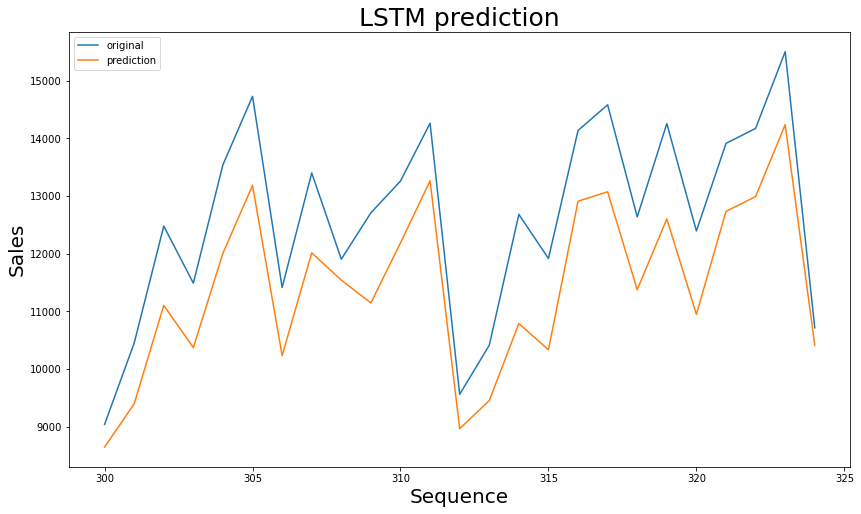

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('LSTM prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 20ms/step - loss: 0.0819 - mae: 0.2708


[0.08186371624469757, 0.2708077132701874]